In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/repos/ProactiveHRI.jl`


In [ ]:
Pkg.instantiate()
Pkg.update()

In [2]:
include("dynamics.jl")
include("planner.jl")
include("planner_utils.jl")
include("utils.jl")
include("plotting.jl")
include("mpc.jl")
include("sim.jl")
include("experiments.jl")

display_data (generic function with 1 method)

### Interaction planner

In [7]:
dt = 0.1
velocity_max = 3.0
# human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 2.])
human = Unicycle(dt, velocity_max, [1., 3.])

time_horizon = 25
# Q = zeros(Float64, human.state_dim, human.state_dim)
# R = diagm([0.; 0.1]) 
# Qt = diagm([10.; 10.])
Q = diagm([0.0; 0.0; 0.])
R = diagm([1.0; 0.1]) 
Qt = diagm([10.; 10.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.01]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 3.0
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 3.])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)


PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 1.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 5.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.01]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2


In [3]:
robot_initial_state = [5.; 5.; -pi / 2.; 0.]
robot_goal_state = [5.; -5.; -pi / 2; 0.]
human_initial_state = [5.; -5.; pi / 2]
human_goal_state = [5.; 5.; pi / 2]
solver = "ECOS"

ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)
# 
# ip = InteractionPlanner(human_hps, 
#                         robot_hps,
#                         human_initial_state,
#                         robot_initial_state,
#                         human_goal_state,
#                         robot_goal_state,
#                         solver)

UndefVarError: UndefVarError: `robot_hps` not defined

In [73]:
# Adds a wall constraint to the planner
wall_1 = Wall("x", 0., 6.1, "less")
wall_constraint(ip, wall_1, "wall_1")
wall_2 = Wall("x", 0.1, 3.2, "greater")
wall_constraint(ip, wall_2, "wall_2")

26-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.GreaterThan{Float64}}, ScalarShape}}:
 x[1,1] - 0.1 x[1,2] ≥ 4.2
 x[2,1] - 0.1 x[2,2] ≥ 4.2
 x[3,1] - 0.1 x[3,2] ≥ 4.2
 x[4,1] - 0.1 x[4,2] ≥ 4.2
 x[5,1] - 0.1 x[5,2] ≥ 4.2
 x[6,1] - 0.1 x[6,2] ≥ 4.2
 x[7,1] - 0.1 x[7,2] ≥ 4.2
 x[8,1] - 0.1 x[8,2] ≥ 4.2
 x[9,1] - 0.1 x[9,2] ≥ 4.2
 x[10,1] - 0.1 x[10,2] ≥ 4.2
 ⋮
 x[18,1] - 0.1 x[18,2] ≥ 4.2
 x[19,1] - 0.1 x[19,2] ≥ 4.2
 x[20,1] - 0.1 x[20,2] ≥ 4.2
 x[21,1] - 0.1 x[21,2] ≥ 4.2
 x[22,1] - 0.1 x[22,2] ≥ 4.2
 x[23,1] - 0.1 x[23,2] ≥ 4.2
 x[24,1] - 0.1 x[24,2] ≥ 4.2
 x[25,1] - 0.1 x[25,2] ≥ 4.2
 x[26,1] - 0.1 x[26,2] ≥ 4.2

In [74]:
incon_problem, xs, us = @time solve(ip.ego_planner.incon, iterations=10, verbose=false, keep_history=false)
incon_problem, xs, us = @time solve(ip.other_planner.incon, iterations=10, verbose=false, keep_history=false);



  0.108073 seconds (450.02 k allocations: 44.022 MiB, 22.26% gc time)


  0.096397 seconds (418.39 k allocations: 38.882 MiB, 22.39% gc time)


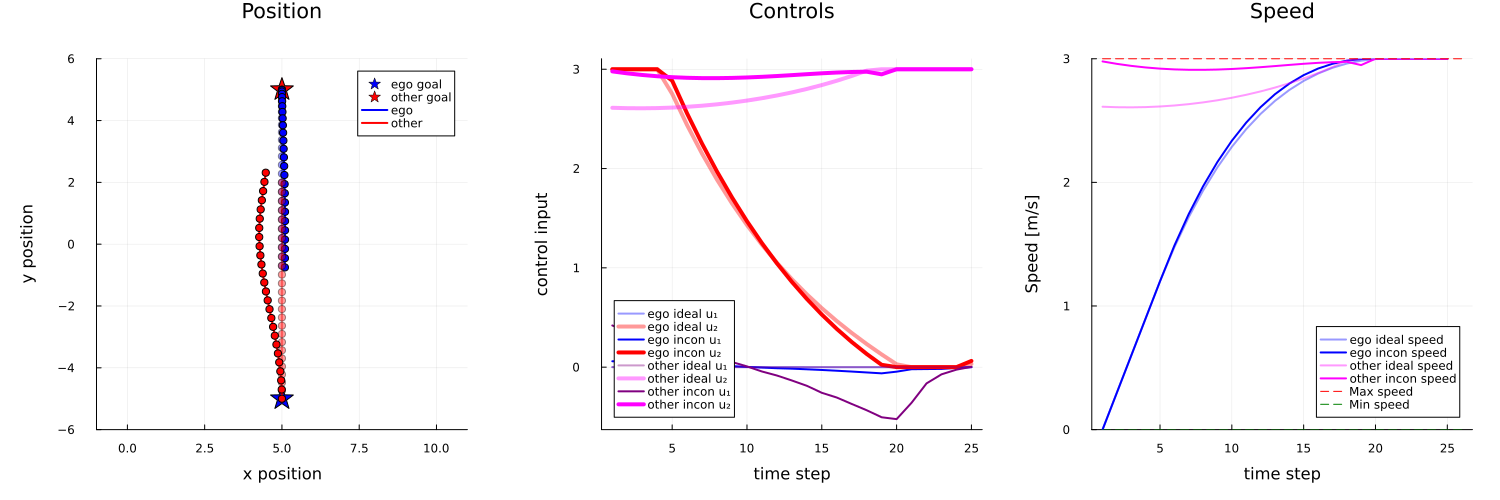

In [75]:
plot_solve_solution(ip, walls=nothing, pos_xlims=[-1, 11], pos_ylims=[-6, 6])

# Iterated Best Response

In [ ]:
@time ibr(ip, 3, "ego")

In [ ]:
plot_solve_solution(ip, pos_xlims=[-1, 11], walls=nothing, pos_ylims=[-6, 6])

# Animation

In [ ]:
animation(ip, pos_xlims=[-1, 11], pos_ylims=[-4, 4])

In [ ]:
avoidance_animation(ip, pos_xlims=[0, 10], pos_ylims=[-5, 5])

# MPC Controller Simulation
*At the moment it is a known issue that the sim breaks if the dynamics classes used are different between the different InteractionPlanner models, will be fixed

In [ ]:
include("sim.jl")
include("mpc.jl")

In [202]:
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 1.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 5.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2


In [203]:
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)


InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [ ]:
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

In [ ]:
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

In [ ]:
robot_path, robot_controls, human_path, human_controls, solve_times = simulate(robot_ip, human_ip, 50, ibr_iterations=2, leader="ego")

In [ ]:
solve_times

In [ ]:
plt = plot(robot_path[:,1], robot_path[:,2], xlims=[-1, 10], ylims=[-5, 5])
plot!(plt, human_path[:,1], human_path[:,2])

In [ ]:
animation(robot_path, human_path, pos_xlims=[-1, 11], pos_ylims=[-2.5, 2.5])

# Summary Plots

### Setup the planner

In [ ]:
dt = 0.1
velocity_max = 1.5
# human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 2.])
human = Unicycle(dt, velocity_max, [1., 1.5])

time_horizon = 50
# Q = zeros(Float64, human.state_dim, human.state_dim)
# R = diagm([0.; 0.1]) 
# Qt = diagm([10.; 10.])
Q = diagm([0.0; 0.0; 0.])
R = diagm([1.0; 0.0]) 
Qt = diagm([10.; 10.; 0.])
markup = 0.8
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.01]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 3.])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)


In [ ]:
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi]
human_goal_state = [0.; 0.; pi]
solver = "ECOS"

ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)

In [ ]:
incon_problem, xs, us = @time solve(ip.ego_planner.incon, iterations=10, verbose=false, keep_history=false)
incon_problem, xs, us = @time solve(ip.other_planner.incon, iterations=10, verbose=false, keep_history=false);

In [ ]:
@time saved_data_test, _, _, _, _ = ibr_save(ip, 2, "ego")

In [ ]:
plot_example = plot_solve_solution(saved_data_test, scatter=false, show_speed=true, show_control=true)

In [ ]:
function plot_solve_solution(problem::SaveData, second_problem::SaveData,show_theta::Bool; pos_xlims=[-1,11], pos_ylims=[-6, 6], scatter=true::Bool, show_speed=true::Bool, show_control=true::Bool)

    l = @layout [a b] 
    width=2000
    height=800
    alpha_plot = 0.7
    linewidth = 2
    markersize = 2
    markersize_large = 7
    ego_color = :blue
    other_color = :red

    global iterations = length(problem.previous_ips)

    alpha_ratio = 1 / (iterations + 1)
    N = problem.previous_ips[1].ego_planner.ideal.hps.time_horizon

    ego_goal_state = problem.previous_ips[1].ego_planner.ideal.opt_params.goal_state
    other_goal_state = problem.previous_ips[1].other_planner.ideal.opt_params.goal_state

    ego_dynamics = problem.previous_ips[1].ego_planner.ideal.hps.dynamics       # use first ip arbitrarily, any iteration will give the same values for these entries
    other_dynamics = problem.previous_ips[1].other_planner.ideal.hps.dynamics

    global ego_ctrl_dim = 2
    global other_ctrl_dim = 2

    # plotting position trajectory

    plot_traj = plot(size=(height, height), xlabel="x position", ylabel="y position", title="Position", margin=10mm, ylims=pos_ylims, xlims=pos_xlims, aspect_ratio=:equal)
    scatter!(ego_goal_state[1:1], ego_goal_state[2:2], marker=:star, markersize=markersize_large, color=ego_color, label="ego goal")
    scatter!(plot_traj, other_goal_state[1:1], other_goal_state[2:2], marker=:star, markersize=markersize_large, color=other_color, label="other goal")

    plot!(plot_traj, value.(problem.previous_ips[end].ego_planner.incon.model[:x])[:,1], value.(problem.previous_ips[end].ego_planner.incon.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="Robot μ = 0.9", alpha=alpha_plot)

    plot!(plot_traj, value.(problem.previous_ips[end].other_planner.incon.model[:x])[:,1], value.(problem.previous_ips[end].other_planner.incon.model[:x])[:,2], color=other_color, linewidth=linewidth, label="Human μ = 0.9", alpha=alpha_plot)


    plot!(plot_traj, value.(second_problem.previous_ips[end].ego_planner.incon.model[:x])[:,1], value.(second_problem.previous_ips[end].ego_planner.incon.model[:x])[:,2], color=:purple, linewidth=linewidth, label="Robot μ = 1.1", alpha=alpha_plot)

    plot!(plot_traj, value.(second_problem.previous_ips[end].other_planner.incon.model[:x])[:,1], value.(second_problem.previous_ips[end].other_planner.incon.model[:x])[:,2], color=:green, linewidth=linewidth, label="Human μ = 1.1", alpha=alpha_plot)

    if scatter
        scatter!(plot_traj, value.(problem.previous_ips[end].ego_planner.ideal.model[:x])[:,1], value.(problem.previous_ips[end].ego_planner.ideal.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(problem.previous_ips[end].other_planner.ideal.model[:x])[:,1], value.(problem.previous_ips[end].other_planner.ideal.model[:x])[:,2], color=other_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(second_problem.previous_ips[end].ego_planner.ideal.model[:x])[:,1], value.(second_problem.previous_ips[end].ego_planner.ideal.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(second_problem.previous_ips[end].other_planner.ideal.model[:x])[:,1], value.(second_problem.previous_ips[end].other_planner.ideal.model[:x])[:,2], color=other_color, linewidth=linewidth, label="", alpha=alpha_plot)
    end
    # plotting speed/control

    # speed parameters
    max_speed = maximum([problem.previous_ips[1].ego_planner.ideal.hps.dynamics.velocity_max, problem.previous_ips[1].other_planner.ideal.hps.dynamics.velocity_max])
    ego_max_speed = problem.previous_ips[1].ego_planner.ideal.hps.dynamics.velocity_max
    other_max_speed = problem.previous_ips[1].other_planner.ideal.hps.dynamics.velocity_max

    # control parameters
    ego_ctrl_dim = problem.previous_ips[1].ego_planner.ideal.hps.dynamics.ctrl_dim
    other_ctrl_dim = problem.previous_ips[1].other_planner.ideal.hps.dynamics.ctrl_dim

    ego_max_ctrl = maximum(problem.previous_ips[1].ego_planner.ideal.hps.dynamics.control_max)
    ego_min_ctrl = minimum(problem.previous_ips[1].ego_planner.ideal.hps.dynamics.control_min)
    other_max_ctrl = maximum(problem.previous_ips[1].other_planner.ideal.hps.dynamics.control_max)
    other_min_ctrl = minimum(problem.previous_ips[1].other_planner.ideal.hps.dynamics.control_min)

    plot_theta = plot(size=(height, height), xlabel="time step", ylabel="abs(Theta)", title="Theta vs. time", margin=10mm, legend=:bottomright)
    plot_ctrl = plot(size=(height, height), xlabel="time step", ylabel="input magnitude", title="Control", margin=10mm)

    # angle plotting
    robot_xs_mu_09 = vector_of_vectors_to_matrix(problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_states)
    human_xs_mu_09 = vector_of_vectors_to_matrix(problem.previous_ips[iterations].other_planner.incon.opt_params.previous_states)
    robot_xs_mu_11 = vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_states)
    human_xs_mu_11 = vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].other_planner.incon.opt_params.previous_states)
    plot!(plot_theta, robot_xs_mu_09[:,3:3], linewidth=2, label="Robot μ = 0.9", color=ego_color)
    plot!(plot_theta, human_xs_mu_09[:,3:3], linewidth=2, label="Human μ = 0.9", color=other_color)
    plot!(plot_theta, robot_xs_mu_11[:,3:3], linewidth=2, label="Robot μ = 1.1", color=:magenta)
    plot!(plot_theta, human_xs_mu_11[:,3:3], linewidth=2, label="Human μ = 1.1", color=:green)

        # ctrl plotting
    plot!(plot_ctrl, 1:N, maximum([ego_max_ctrl, other_max_ctrl]) * ones(Float64, N), linestyle=:dash, linewith=linewidth,  color=:green, label="Control Limits")
    plot!(plot_ctrl, 1:N, minimum([ego_min_ctrl, other_min_ctrl]) * ones(Float64, N), linestyle=:dash, linewith=linewidth,  color=:green, label="")   
        # ego plot
    for j in 1:ego_ctrl_dim
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_controls)[:, j], label="", color=RGB(1 - (1 / ego_ctrl_dim) * j, 0., (1 / ego_ctrl_dim) * j), linewidth=linewidth, alpha=(i * alpha_ratio))
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_controls)[:, j], label="", color=RGB(1 - (1 / ego_ctrl_dim) * j, 0., (1 / ego_ctrl_dim) * j), linewidth=linewidth, alpha=(i * alpha_ratio))
    end 
        # other plot
    for k in 1:other_ctrl_dim
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(problem.previous_ips[iterations].other_planner.incon.opt_params.previous_controls)[:, k], label="", color=RGB((1 / other_ctrl_dim) * k, 1 - (1 / other_ctrl_dim) * k, 0.), linewidth=linewidth, alpha=(i * alpha_ratio))
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].other_planner.incon.opt_params.previous_controls)[:, k], label="", color=RGB((1 / other_ctrl_dim) * k, 1 - (1 / other_ctrl_dim) * k, 0.), linewidth=linewidth, alpha=(i * alpha_ratio))
    end 


    slack_violation = Vector{Float64}(undef, iterations)

    for i in 1:iterations
        slack_violation[i] = value(problem.previous_ips[i].ego_planner.incon.model[:ϵ])
    end

    plot_slack_violation = plot(size=(height, height), xlabel="Iteration", ylabel="ϵ (slack value)", title="Slack (collision) Violation", margin=10mm)

    plot!(plot_slack_violation, 1:iterations, slack_violation, color=:black, label="Slack")

    # plotting inconvenience value over iterations

    incon_budget = problem.previous_ips[1].ego_planner.incon.hps.inconvenience_ratio
    inconvenience_ego = Vector{Float64}(undef, iterations)
    inconvenience_other = Vector{Float64}(undef, iterations)

    ideal_incon_ego = compute_convenience_value(ego_dynamics, matrix_to_vector_of_vectors(value.(problem.previous_ips[1].ego_planner.ideal.model[:x])), matrix_to_vector_of_vectors(value.(problem.previous_ips[1].ego_planner.ideal.model[:u])), ego_goal_state, problem.previous_ips[1].ego_planner.incon.hps.inconvenience_weights)

    ideal_incon_other = compute_convenience_value(other_dynamics, matrix_to_vector_of_vectors(value.(problem.previous_ips[1].other_planner.ideal.model[:x])), matrix_to_vector_of_vectors(value.(problem.previous_ips[1].other_planner.ideal.model[:u])), other_goal_state, problem.previous_ips[1].other_planner.incon.hps.inconvenience_weights)

    for i in 1:iterations
        inconvenience_ego[i] = compute_convenience_value(ego_dynamics, problem.previous_ips[i].ego_planner.incon.opt_params.previous_states, problem.previous_ips[i].ego_planner.incon.opt_params.previous_controls, ego_goal_state, problem.previous_ips[1].ego_planner.incon.hps.inconvenience_weights)
        
        inconvenience_other[i] = compute_convenience_value(other_dynamics, problem.previous_ips[i].other_planner.incon.opt_params.previous_states, problem.previous_ips[i].other_planner.incon.opt_params.previous_controls, other_goal_state, problem.previous_ips[1].other_planner.incon.hps.inconvenience_weights)
    end

    inconvenience_ego ./= ideal_incon_ego
    inconvenience_other ./= ideal_incon_other 

    plot_incon = plot(size=(height, height), xlabel="Iteration", ylabel="Inconvenience", title="Agent Inconvenience", margin=10mm)
    plot!(plot_incon, 1:iterations, ones(iterations), linestyle=:dash, linewith=linewidth, color=:green, label="Ideal Incon")
    plot!(plot_incon, 1:iterations, ones(iterations) .+ incon_budget, linestyle=:dash, linewith=linewidth, color=:black, label="Incon Budget")
    plot!(plot_incon, 1:iterations, inconvenience_ego, color=ego_color, linewidth=linewidth, label="Ego Incon")
    plot!(plot_incon, 1:iterations, inconvenience_other, color=other_color, linewidth=linewidth, label="Other Incon")

    plot(plot_traj, plot_theta, layout=l, size=(width, height))
end


# Sim Experimentation Utils

In [ ]:
robot_params = PlannerParams(robot_ip.ego_planner.incon.hps, robot_ip.ego_planner.incon.opt_params, robot_ip.other_planner.incon.hps, robot_ip.other_planner.incon.opt_params)
human_params = PlannerParams(human_ip.ego_planner.incon.hps, human_ip.ego_planner.incon.opt_params, human_ip.other_planner.incon.hps, human_ip.other_planner.incon.opt_params)

In [ ]:
sim_params = IPSimParams(robot_params, human_params)

In [ ]:
# robot_xs, robot_us, human_xs, human_us, solve_times = simulate(robot_ip, human_ip, 50, ibr_iterations=2, leader="other")

In [ ]:
sim_data = SimData(sim_params, solve_times, robot_path, robot_controls, human_path, human_controls)

In [ ]:
plot_solve_solution(sim_data)

In [ ]:
sim_data.solve_times

# Experimentation Code

In [ ]:
# for experiment in experiments
#     set up problem. Assign hyperparameters. Cycle through hps for each experiment
#     (markup, collision slack, trust region weights, incon weights, collision radius, incon ratio)
#     for opt_param in opt_params
#         assign new opt_params to the problem.
#         (initial states, goal states)
#         register the InteractionPlanner
#         run simulation
#         store data into dictionary w/ with key=run_number
#         (store: hps, opt_params, and paths) -- enough data to recreate the problem and plot Base.load_path_setup_code
#         delete interaction planner before cycling through the loop.
#     end
# end

In [ ]:
using ProgressBars

In [118]:
# setting up the problem to be deep copied for experiments
# this is for experimentation where each agent correctly assumes the policy of the oteher agent

# setting up the robot planner
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)
                             
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


### Mohr's Circle-ish Implementation 

In [119]:
include("experiments.jl")

display_data (generic function with 1 method)

In [120]:
test_human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

DynamicallyExtendedUnicycle{Float64}
  dt: Float64 0.1
  state_dim: Int64 4
  ctrl_dim: Int64 2
  velocity_min: Float64 0.0
  velocity_max: Float64 1.5
  control_min: Array{Float64}((2,)) [-1.0, -1.5]
  control_max: Array{Float64}((2,)) [1.0, 1.5]


In [121]:
robot_states = mohrs_circle_states(test_human, [0., 0., 0., 0.], [10., 0., 0., 0.], pi / 6);

In [122]:
human_states = [([10., 0., pi, 0.], [0., 0., pi, 0.])]

1-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([10.0, 0.0, 3.141592653589793, 0.0], [0.0, 0.0, 3.141592653589793, 0.0])

### Simulation Code

In [123]:
sim_test = simulation_sweep(robot_ip, human_ip, 50, robot_states, human_states)

0.0%┣                                               ┫ 0/12 [00:00<00:00, -0s/it]


8.3%┣███▋                                       ┫ 1/12 [00:14<Inf:Inf, InfGs/it]


16.7%┣███████▊                                      ┫ 2/12 [00:26<04:17, 26s/it]


25.0%┣███████████▌                                  ┫ 3/12 [00:38<02:49, 19s/it]


33.3%┣███████████████▍                              ┫ 4/12 [00:49<02:11, 16s/it]


41.7%┣███████████████████▏                          ┫ 5/12 [01:01<01:47, 15s/it]


50.0%┣███████████████████████                       ┫ 6/12 [01:13<01:27, 15s/it]


58.3%┣██████████████████████████▉                   ┫ 7/12 [01:24<01:10, 14s/it]


66.7%┣██████████████████████████████▊               ┫ 8/12 [01:36<00:55, 14s/it]


75.0%┣██████████████████████████████████▌           ┫ 9/12 [01:47<00:40, 13s/it]


83.3%┣█████████████████████████████████████▌       ┫ 10/12 [01:59<00:27, 13s/it]


91.7%┣█████████████████████████████████████████▎   ┫ 11/12 [02:11<00:13, 13s/it]


100.0%┣████████████████████████████████████████████┫ 12/12 [02:23<00:00, 13s/it]
100.0%┣████████████████████████████████████████████┫ 12/12 [02:23<00:00, 13s/it]


Dict{String, SimData} with 12 entries:
  "Run 4"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 10" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 1"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 11" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 6"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 12" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 2"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 9"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 5"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 8"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 7"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 3"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters

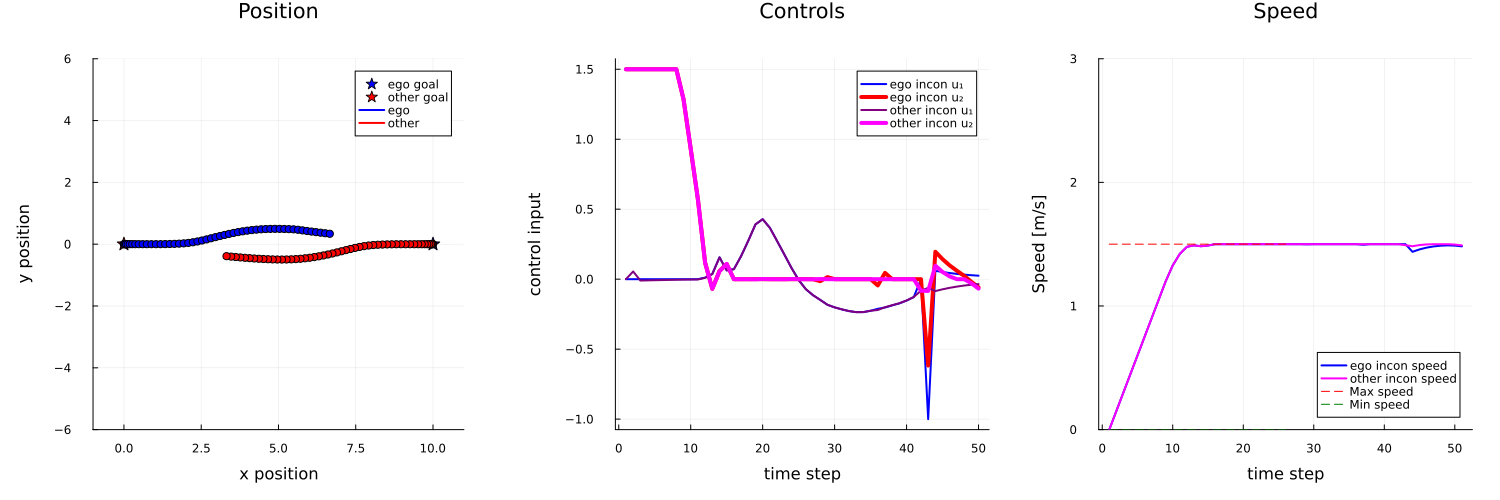

In [124]:
plot_solve_solution(sim_test["Run 12"], pos_xlims=[-1, 11], pos_ylims=[-6, 6])

# Data Metrics

In [ ]:
compute_average_control_effort(sim_data)

In [ ]:
compute_average_acceleration_per_segment(sim_data)

In [ ]:
compute_path_efficiency(sim_data)

In [ ]:
compute_path_irregularity_index(sim_data)

In [ ]:
compute_minimum_distance(sim_data)

In [ ]:
ttc = compute_time_to_collision(sim_data)
# ttc["Time to collision"]
# plot(1:50, ttc["Time to collision"])

In [ ]:
compute_dθ_dt(sim_data)

In [ ]:
compute_θ(sim_data)

In [ ]:
compute_time(sim_data)

In [125]:
test_data_sweep_metrics = evaluate_sim(sim_test)

0.0%┣                                               ┫ 0/12 [00:00<00:00, -0s/it]


5151

8.3%┣███▋                                       ┫ 1/12 [00:03<Inf:Inf, InfGs/it]


5151

16.7%┣███████▉                                       ┫ 2/12 [00:09<01:28, 9s/it]


5151

25.0%┣███████████▊                                   ┫ 3/12 [00:14<01:05, 7s/it]


5151

33.3%┣███████████████▊                               ┫ 4/12 [00:20<00:53, 7s/it]


5151

41.7%┣███████████████████▋                           ┫ 5/12 [00:26<00:45, 6s/it]


5151

50.0%┣███████████████████████▌                       ┫ 6/12 [00:31<00:38, 6s/it]


5151

58.3%┣███████████████████████████▍                   ┫ 7/12 [00:37<00:31, 6s/it]


5151

66.7%┣███████████████████████████████▍               ┫ 8/12 [00:42<00:24, 6s/it]


5151

75.0%┣███████████████████████████████████▎           ┫ 9/12 [00:48<00:18, 6s/it]


5151

83.3%┣██████████████████████████████████████▍       ┫ 10/12 [00:54<00:12, 6s/it]


5151

91.7%┣██████████████████████████████████████████▏   ┫ 11/12 [00:59<00:06, 6s/it]


5151

100.0%┣█████████████████████████████████████████████┫ 12/12 [01:05<00:00, 6s/it]
100.0%┣█████████████████████████████████████████████┫ 12/12 [01:05<00:00, 6s/it]


Dict{String, SimMetrics} with 12 entries:
  "Run 4"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.437838, "Other Avg Co…
  "Run 10" => SimMetrics(Dict("Ego Avg Control Effort"=>0.521107, "Other Avg Co…
  "Run 1"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.481621, "Other Avg Co…
  "Run 11" => SimMetrics(Dict("Ego Avg Control Effort"=>0.525695, "Other Avg Co…
  "Run 6"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.373435, "Other Avg Co…
  "Run 12" => SimMetrics(Dict("Ego Avg Control Effort"=>0.445593, "Other Avg Co…
  "Run 2"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.431108, "Other Avg Co…
  "Run 9"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.497094, "Other Avg Co…
  "Run 5"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.408006, "Other Avg Co…
  "Run 8"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.589441, "Other Avg Co…
  "Run 7"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.336483, "Other Avg Co…
  "Run 3"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.414458, "

In [ ]:
test_data_sweep_metrics["Run 5"].plots["Combined Plot"]

In [126]:
display_data(test_data_sweep_metrics)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 12 Metrics</u></b>
<b> </b> 
<b>Ego Average Control Effort = </b>0.4456
<b>Other Average Control Effort = </b>0.4148
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-<

# Social Force Model Sim

In [149]:
ego = DoubleIntegrator2D(dt, 3., [1., 3.])

DoubleIntegrator2D{Float64}
  dt: Float64 0.1
  state_dim: Int64 4
  ctrl_dim: Int64 2
  velocity_min: Float64 0.0
  velocity_max: Float64 3.0
  control_min: Array{Float64}((2,)) [-1.0, -3.0]
  control_max: Array{Float64}((2,)) [1.0, 3.0]


In [150]:
include("human.jl")

social_forces (generic function with 1 method)

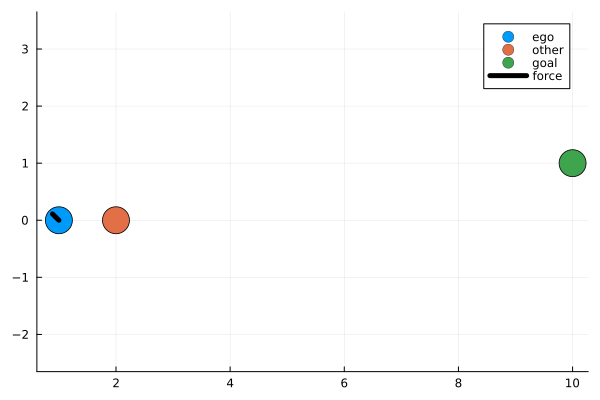

In [151]:
# example usage
state = [1.; 0.; 1.; 0.]
goal_position = [10.; 1.]
others = [[ego, [2; 0.; 0.0; 0.]]]
desired_velocity = 2.
forces = social_forces(ego, state, goal_position, others, desired_velocity, p=2., ψ=pi/6, c=0.3)
# 
markersize = 15
scatter(state[1:1], state[2:2], markersize=markersize, label="ego", aspect_ratio=:equal)
for (_, o) in others
    scatter!(o[1:1], o[2:2], markersize=markersize, label="other")
end
scatter!(goal_position[1:1], goal_position[2:2], markersize=markersize, label="goal")
plot!([state[1], state[1] + forces[1]], [state[2], state[2] + forces[2]], label="force", linewidth=5, color="black")

In [93]:
get_position(robot_sfm, [1.; 1.])

2-element Vector{Float64}:
 1.0
 1.0

In [41]:
forces

2×1 Matrix{Float64}:
 0.8892880700907134
 0.21502719065775186

In [94]:
include("sim.jl")

simulate_human_social_forces (generic function with 2 methods)

In [235]:
# setting up the problem to be deep copied for experiments
# this is for experimentation where each agent correctly assumes the policy of the oteher agent

# setting up the robot planner
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = Unicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = Unicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.])

collision_slack = 150.

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.]
human_initial_state = [10.; -0.05; pi]
human_goal_state = [0.; 0.; pi]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)
                             
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [160]:
ego_params = PlannerParams(human_ip.ego_planner.incon.hps, human_ip.ego_planner.incon.opt_params, robot_ip.ego_planner.incon.hps, robot_ip.ego_planner.incon.opt_params)
other_params = PlannerParams(robot_ip.ego_planner.incon.hps, robot_ip.ego_planner.incon.opt_params, human_ip.ego_planner.incon.hps, human_ip.ego_planner.incon.opt_params)
sim_params = IPSimParams(ego_params, other_params)

IPSimParams(PlannerParams(PlannerHyperparameters{Float64}
  dynamics: Unicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((3, 3)) [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 1.0]
  Qt: Array{Float64}((3, 3)) [10.0 0.0 0.0; 0.0 10.0 0.0; 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 5.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2
, PlannerOptimizerParams{Float64}
  As: Array{Matrix{Float64}}((25,))
  Bs: Array{Matrix{Float64}}((25,))
  Cs: Array{Vector{Float64}}((25,))
  Gs: Array{Vector{Float64}}((26,))
  Hs: Array{Float64}((26,)) [-101.00250000035565, -98.00250033103417, -95.00248638090659, -92.00246313225189, -89.00243391531934, -86.00240092671082, -83.00236559414125, -80.00232883079043, -77.00229121048116, -74.00225308684364  …  -53.00198243385005, -50.0019436681325

In [161]:
human_states, human_control, robot_states, robot_controls = simulate_human_social_forces(human_ip, ego, [0.; 0.; 0.; 0.], [10.; 0.; 0.; 0.], 50)

Unicycle{Float64}

([10.000000000017895 -0.049999999977504865 3.1415926535923324; 9.850000406577056 -0.0498979415818499 3.14023187150026; … ; 2.812039588896725 -0.7004175240283945 2.929594364190642; 2.670051338543854 -0.6694213888545164 2.923733178381328], [-0.01360782092072642 1.4999963973394077; -0.009471416026500618 1.4999973624532494; … ; -0.06886735115890681 1.4747277558508338; -0.05861185809313907 1.4533232297160783], [0.0 0.0 0.0 0.0; 0.007489893837486549 5.053081254443962e-8 0.14979787674973097 1.0106162508887923e-6; … ; 8.853658671223537 0.2503994444320055 2.6685675290343265 0.0036813194476282805; 9.121240855300286 0.24916881518874043 2.683076152500674 -0.02829390431293004], [1.4979787674973095 1.0106162508887922e-5; 1.4229142357355273 1.0573528155586594e-5; … ; 0.16837354099550958 -0.27261975306806974; 0.1450862346634766 -0.3197522376055832])

In [162]:
sim_data = SimData(sim_params, ([0.], nothing), human_states, human_control, robot_states, robot_controls)

SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}
  dynamics: Unicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((3, 3)) [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 1.0]
  Qt: Array{Float64}((3, 3)) [10.0 0.0 0.0; 0.0 10.0 0.0; 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 5.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2
, PlannerOptimizerParams{Float64}
  As: Array{Matrix{Float64}}((25,))
  Bs: Array{Matrix{Float64}}((25,))
  Cs: Array{Vector{Float64}}((25,))
  Gs: Array{Vector{Float64}}((26,))
  Hs: Array{Float64}((26,)) [69.05182039067145, 71.31437329205666, 73.48111219354547, 75.55017074533558, 77.52142364841053, 79.3948696807812, 81.17071221922434, 82.84934383811942, 84.43130765689341, 85.91727758547337  …  93.71503676671725, 94.47349557523344, 95.

In [163]:
sfm_metrics = evaluate_sim(sim_data)

5151

SimMetrics(Dict("Ego Avg Control Effort" => 1.5264007439796385, "Other Avg Control Effort" => 0.570379519380497), Dict("ego PI" => 9.07571068464737, "other PI" => 62.62999876827608), Dict("ego average acceleration" => 0.00933463352466588, "other average acceleration" => 0.06394842628861486), Dict("Ego Path Efficiency" => 1.7292145413300153, "Other Path Efficiency" => 2.1072808102619383), Dict("Min Distance" => 0.8859106064954617), Dict("Time to collision" => [6.331696494262181, 6.1227270067209005, 5.999652877327791, 5.999719337373648, 5.999714342897914, 5.999315056560148, 5.800022651342929, 5.487125607055877, 5.159753649893992, 4.999931848764547  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]), Dict("Other θ" => [0.0, 0.14979787674973052, 0.2920893003232834, 0.42724650266877473, 0.5556226212122051, 0.6775525497603511, 0.7933537272440476, 0.9033268623394676, 1.007756591710256, 1.1069120693474412  …  0.7011831285020739, 0.6660227137624857, 0.6337772845626289, 0.6042160208786299, 0.

In [164]:
display_sfm_metrics = Dict("Run 1" => sfm_metrics, "Run 2" => sfm_metrics)

Dict{String, SimMetrics} with 2 entries:
  "Run 2" => SimMetrics(Dict("Ego Avg Control Effort"=>1.5264, "Other Avg Contr…
  "Run 1" => SimMetrics(Dict("Ego Avg Control Effort"=>1.5264, "Other Avg Contr…

In [165]:
display_data(display_sfm_metrics)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 2 Metrics</u></b>
<b> </b> 
<b>Ego Average Control Effort = </b>1.526
<b>Other Average Control Effort = </b>0.5704
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b

In [137]:
good_human_states, good_human_controls, good_robot_states, good_robot_controls, solve_times = simulate(human_ip, robot_ip, 50)

([10.0 -1.0 3.141592653589793; 9.850017394594209 -0.9980971043944457 3.1162191310205616; … ; 2.6962016775453357 -0.2859905321603518 3.035899642588985; 2.5564306773553938 -0.27116245826885504 3.035901978868008], [-0.25373522569231466 1.4999870013939098; -0.19105269812108264 1.499968774636574; … ; 3.993083310942769e-5 1.44521880564616; 2.3362790230347495e-5 1.4055534237242098], [0.0 0.0 0.0; 0.1499993854783794 0.0 -4.888649940123325e-8; … ; 7.303959881841109 0.30903430848859476 -0.10402464457546019; 7.443338653157739 0.2943529057734724 -0.10587048760331634], [-4.888649940123324e-7 1.499993854783794; 7.870688352196467e-8 1.4999974166254406; … ; -0.02149113772164212 1.4403877293705036; -0.018458430278561488 1.4014988782131774], ([0.09255290031433105, 0.09563899040222168, 0.07503104209899902, 0.0941469669342041, 0.09538102149963379, 0.07465696334838867, 0.10109400749206543, 0.09719681739807129, 0.07669711112976074, 0.0980679988861084  …  0.0897989273071289, 0.08817481994628906, 0.1145870685

In [138]:
good_sim_data = SimData(sim_params, solve_times, good_human_states, good_human_controls, good_robot_states, good_robot_controls)

SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}
  dynamics: Unicycle{Float64}
  time_horizon: Int64 51
  Q: Array{Float64}((3, 3)) [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 1.0]
  Qt: Array{Float64}((3, 3)) [10.0 0.0 0.0; 0.0 10.0 0.0; 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 0.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 5.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2
, PlannerOptimizerParams{Float64}
  As: Array{Matrix{Float64}}((25,))
  Bs: Array{Matrix{Float64}}((25,))
  Cs: Array{Vector{Float64}}((25,))
  Gs: Array{Vector{Float64}}((26,))
  Hs: Array{Float64}((26,)) [8.533143866137296, 10.533569000659135, 12.521805949078075, 14.498508820022622, 16.465370655396384, 18.424669772210144, 20.379025141983, 22.331251350021283, 24.28426898121001, 26.241038933732067  …  39.67599081835984, 41.410517070723415

In [139]:
good_sim_data = evaluate_sim(good_sim_data)

5151

SimMetrics(Dict("Ego Avg Control Effort" => 1.4970950320418595, "Other Avg Control Effort" => 1.4704605236786952), Dict("ego PI" => 0.42446478227552076, "other PI" => 4.54708037150193), Dict("ego average acceleration" => 0.018886715533940012, "other average acceleration" => 0.01969899531412329), Dict("Ego Path Efficiency" => 1.726669238054967, "Other Path Efficiency" => 1.7263260346258549), Dict("Min Distance" => 0.9803615027287567), Dict("Time to collision" => [NaN, NaN, NaN, 2.80963370649687, 2.7240251990457462, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]), Dict("Other θ" => [0.0, 4.942156062059701e-8, 4.2146848510894035e-8, 2.9802322387695312e-8, 2.580956827951785e-8, 2.580956827951785e-8, 4.942156062059701e-8, 0.004651021265867712, 0.017798496989541765, 0.03357692722550365  …  0.06289403521863247, 0.07115301589116124, 0.07807083220202506, 0.08387808711752859, 0.08876454460779112, 0.09288706497391028, 0.09638016903375694, 0.09934462137338534, 0.1018

In [140]:
display_ip_metrics = Dict("Run 1" => good_sim_data, "Run 2" => good_sim_data)

Dict{String, SimMetrics} with 2 entries:
  "Run 2" => SimMetrics(Dict("Ego Avg Control Effort"=>1.4971, "Other Avg Contr…
  "Run 1" => SimMetrics(Dict("Ego Avg Control Effort"=>1.4971, "Other Avg Contr…

In [141]:
display_data(display_ip_metrics)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 2 Metrics</u></b>
<b> </b> 
<b>Ego Average Control Effort = </b>1.497
<b>Other Average Control Effort = </b>1.47
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><

┌ Info: Saved animation to /tmp/jl_wv6bQzqtw5.gif
└ @ Plots /home/jasper/.julia/packages/Plots/3BCH5/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_wv6bQzqtw5.gif")
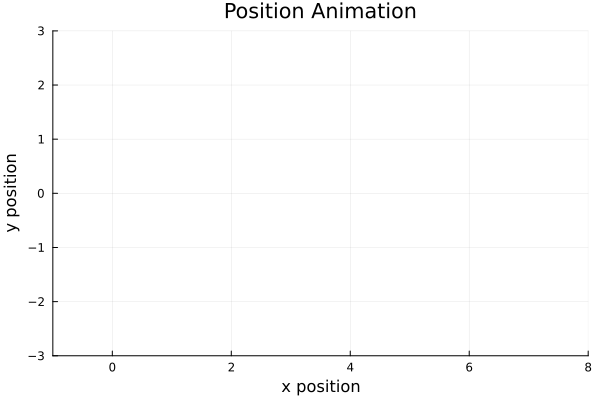

In [99]:
animation((human_states), (robot_states))

┌ Info: Saved animation to /tmp/jl_4BUXmr2tAN.gif
└ @ Plots /home/jasper/.julia/packages/Plots/3BCH5/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_4BUXmr2tAN.gif")
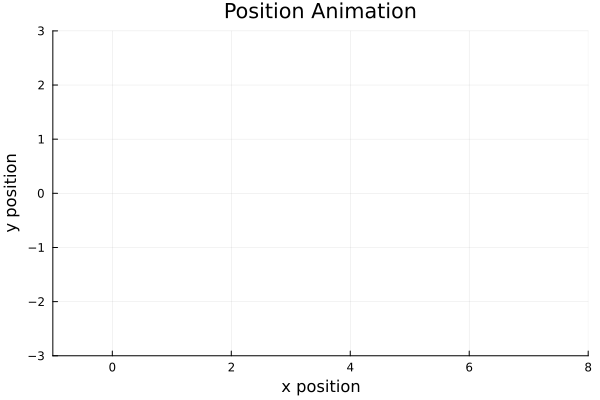

In [76]:
animation(good_human_states, good_robot_states)

In [166]:
compute_path_irregularity_index(sim_data)

Dict{String, Float64} with 2 entries:
  "ego PI"   => 9.07571
  "other PI" => 62.63

# Experimental Setup

In [10]:
using Serialization

In [15]:
# example robot for plots 
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

# setting up ip
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)


InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [16]:
# setting up the human planner to be used for experiments (cooperative human)
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]
# setting up the IP object to be serialized and saved for all trials
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

# saving object
serialize("../experimental_setup/cooperative_human_ip.dat", human_ip)

In [17]:
# setting up the human planner to be used for experiments (less cooperative human)
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([7.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 0.9
collision_slack = 50.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 0.75
inconvenience_ratio = 0.1


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]
# setting up the IP object to be serialized and saved for all trials
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

# saving object
serialize("../experimental_setup/less-cooperative_human_ip.dat", human_ip)

In [18]:
# setting up the human planner to be used for experiments (ignorant/ideal planning human)
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([7.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 0.9
collision_slack = 0.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 0.75
inconvenience_ratio = 0.1


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]
# setting up the IP object to be serialized and saved for all trials
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

# saving object
serialize("../experimental_setup/ignorant_human_ip.dat", human_ip)

In [9]:
test_human_ip = deserialize("../experimental_setup/cooperative_human_ip.dat")

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [19]:
circular_experiment_states = mohrs_circle_states(robot_ip.ego_planner.incon.hps.dynamics, [0.; 0.; 0.; 0.], [10.; 0.; 0.; 0.], π/20)

40-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([0.0, 0.0, 0.0, 0.0], [10.0, 0.0, 0.0, 0.0])
 ([0.061558297024310704, -0.7821723252011543, 0.15707963267948966, 0.0], [9.93844170297569, 0.7821723252011543, 0.15707963267948966, 0.0])
 ([0.24471741852423268, -1.545084971874737, 0.3141592653589793, 0.0], [9.755282581475768, 1.545084971874737, 0.3141592653589793, 0.0])
 ([0.5449673790581606, -2.2699524986977337, 0.47123889803846897, 0.0], [9.45503262094184, 2.2699524986977337, 0.47123889803846897, 0.0])
 ([0.9549150281252627, -2.938926261462366, 0.6283185307179586, 0.0], [9.045084971874736, 2.938926261462366, 0.6283185307179586, 0.0])
 ([1.4644660940672622, -3.5355339059327373, 0.7853981633974483, 0.0], [8.535533905932738, 3.5355339059327373, 0.7853981633974483, 0.0])
 ([2.061073738537634, -4.045084971874737, 0.9424777960769379, 0.0], [7.938926261462366, 4.045084971874737, 0.9424777960769379, 0.0])
 ([2.730047501302266, -4.455032620941839, 1.0995574287564276, 0.0], [7.26995249

In [21]:
serialize("../experimental_setup/circular_experiment_states", circular_experiment_states)

In [254]:
run_experiment(robot_ip, test_human_ip, 50, circular_experiment_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])], "experimental_setup/metrics_test.dat")

--------------------------------------------------------------------------------
Running Simulations
--------------------------------------------------------------------------------


0.0%┣                                                ┫ 0/4 [00:00<00:00, -0s/it]


25.0%┣██████████▊                                ┫ 1/4 [00:13<Inf:Inf, InfGs/it]


50.0%┣███████████████████████▌                       ┫ 2/4 [00:23<00:47, 23s/it]


75.0%┣███████████████████████████████████▎           ┫ 3/4 [00:34<00:17, 17s/it]


--------------------------------------------------------------------------------
Evaluating Simulations
--------------------------------------------------------------------------------


100.0%┣██████████████████████████████████████████████┫ 4/4 [00:45<00:00, 15s/it]
100.0%┣██████████████████████████████████████████████┫ 4/4 [00:45<00:00, 15s/it]
0.0%┣                                                ┫ 0/4 [00:00<00:00, -0s/it]


5151

25.0%┣██████████▊                                ┫ 1/4 [00:03<Inf:Inf, InfGs/it]


5151

50.0%┣████████████████████████                        ┫ 2/4 [00:09<00:18, 9s/it]


5151

75.0%┣████████████████████████████████████            ┫ 3/4 [00:14<00:07, 7s/it]


5151Experiment finished in 64.98731589317322

100.0%┣███████████████████████████████████████████████┫ 4/4 [00:20<00:00, 7s/it]
100.0%┣███████████████████████████████████████████████┫ 4/4 [00:20<00:00, 7s/it]


Dict{String, SimMetrics} with 4 entries:
  "Run 2" => SimMetrics(Dict("Ego Avg Control Effort"=>0.472788, "Other Avg Con…
  "Run 1" => SimMetrics(Dict("Ego Avg Control Effort"=>0.445557, "Other Avg Con…
  "Run 3" => SimMetrics(Dict("Ego Avg Control Effort"=>0.514951, "Other Avg Con…
  "Run 4" => SimMetrics(Dict("Ego Avg Control Effort"=>0.4201, "Other Avg Contr…

In [255]:
metrics = deserialize("experimental_setup/metrics_test.dat")
display_data(metrics)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 4 Metrics</u></b>
<b> </b> 
<b>Ego Average Control Effort = </b>0.4201
<b>Other Average Control Effort = </b>0.4152
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</

In [1]:
using JLD2